In [1]:
import os, sys, time, random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.preprocessing import MinMaxScaler

In [2]:
sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *

In [3]:
data_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-13_classify_datagen_no_dissipation"
raw_data = load_data(path=data_path,as_df=False)

Finished loading data into numpy array. Took 14.64s


In [4]:
offset = 150
shifted_data, center = get_window(raw_data,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

The Echo pulse occurs at timestep: 628


478 778


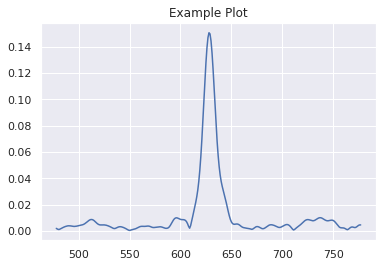

In [6]:
print(center-offset,center+offset)
plt.plot(range(center-offset,center+offset),shifted_data[2,:])
plt.title("Example Plot")
plt.show()

## EDA

In [7]:
log_shifteddata = np.log(shifted_data)

# Get Mean and Standard deviations for shifted data and Log-scaled shifted data
m_sdata,std_sdata=np.mean(shifted_data,axis=0),np.std(shifted_data,axis=0)
m_lgdata,std_lgdata=np.mean(log_shifteddata,axis=0),np.std(log_shifteddata,axis=0)

## Plots

### Plot distribution of Mean $\pm$ std.dev for shifted data

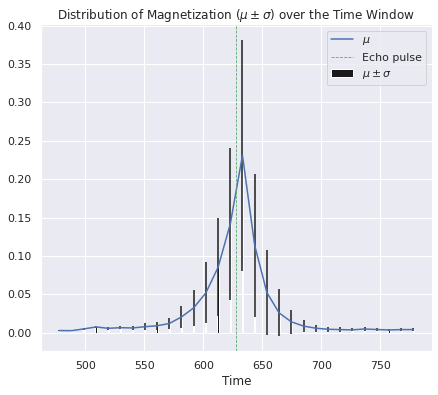

In [8]:
fig,ax = plt.subplots(figsize=(7,6))
x = np.linspace(center-offset,center+offset,30)
ax.bar(x,height=m_sdata[::10],yerr=std_sdata[::10],color='k',width=0.98,label=r"$\mu \pm \sigma$")
ax.plot(x,m_sdata[::10],label=r'$\mu$')
ax.axvline(x=center,color='g',ls='--',lw=0.8,label='Echo pulse')

ax.set(xlabel='Time',title=r'Distribution of Magnetization ($\mu \pm \sigma$) over the Time Window')
ax.yaxis.grid(True)
ax.legend()

sns.despine()
plt.show()

### Plot distribution of Mean $\pm$ std.dev for log-scale shifted data

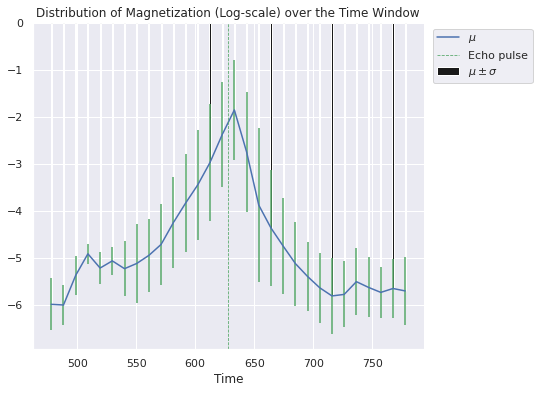

In [9]:
fig,axes = plt.subplots(figsize=(7,6))
x = np.linspace(center-offset,center+offset,30)
axes.bar(x,height=m_lgdata[::10],yerr=std_lgdata[::10],color='k',ecolor='g',width=0.98,label=r"$\mu \pm \sigma$")
axes.plot(x,m_lgdata[::10],label=r'$\mu$')
axes.axvline(x=center,color='g',ls='--',lw=0.8,label='Echo pulse')

axes.set(xlabel='Time',title=r'Distribution of Magnetization (Log-scale) over the Time Window')
axes.yaxis.grid(True)
axes.legend(bbox_to_anchor=[1.01,1])

sns.despine()
plt.show()

### Plot KDE plot of Mean for shifted data

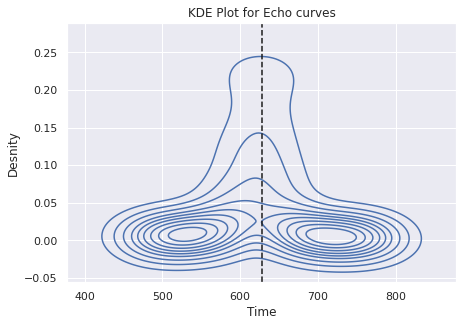

In [10]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.9,0.9])
sns.kdeplot(x=range(center-offset,center+offset),y=m_sdata,ax=axes1)
axes1.axvline(x=center,color='k',ls='--',label='Echo pulse')
axes1.set(xlabel="Time",ylabel="Desnity",title="KDE Plot for Echo curves")
plt.show()

## EDA based on Magnetization values



In [11]:
shifted_df = pd.DataFrame(shifted_data,columns=['Feature'+str(i+center-offset) for i in range(len(shifted_data[0]))])
shifted_df.tail()

,Feature478,Feature479,Feature480,Feature481,Feature482,Feature483,Feature484,Feature485,Feature486,Feature487,Feature488,Feature489,Feature490,Feature491,Feature492,Feature493,Feature494,Feature495,Feature496,Feature497,Feature498,Feature499,Feature500,Feature501,Feature502,Feature503,Feature504,Feature505,Feature506,Feature507,Feature508,Feature509,Feature510,Feature511,Feature512,Feature513,Feature514,Feature515,Feature516,Feature517,...,Feature738,Feature739,Feature740,Feature741,Feature742,Feature743,Feature744,Feature745,Feature746,Feature747,Feature748,Feature749,Feature750,Feature751,Feature752,Feature753,Feature754,Feature755,Feature756,Feature757,Feature758,Feature759,Feature760,Feature761,Feature762,Feature763,Feature764,Feature765,Feature766,Feature767,Feature768,Feature769,Feature770,Feature771,Feature772,Feature773,Feature774,Feature775,Feature776,Feature777
9995,0.002047,0.001541,0.001136,0.000877,0.000753,0.000726,0.000808,0.001037,0.001394,0.001826,0.002289,0.002755,0.003216,0.003675,0.004140,0.004618,0.005113,0.005612,0.006083,0.006480,0.006751,0.006855,0.006778,0.006540,0.006200,0.005842,0.005564,0.005452,0.005560,0.005895,0.006411,0.007018,0.007597,0.008020,0.008183,0.008026,0.007547,0.006809,0.005925,0.005042,...,0.005498,0.004848,0.004134,0.003521,0.003119,0.002922,0.002862,0.002924,0.003146,0.003514,0.003914,0.004188,0.004210,0.003927,0.003379,0.002708,0.002177,0.002088,0.002425,0.002883,0.003258,0.003477,0.003529,0.003420,0.003155,0.002748,0.002238,0.001694,0.001208,0.000837,0.000526,0.000171,0.000553,0.001372,0.002331,0.003297,0.004131,0.004712,0.004966,0.004875
9996,0.002637,0.002165,0.001787,0.001627,0.001701,0.001876,0.002016,0.002059,0.002011,0.001930,0.001904,0.002010,0.002259,0.002604,0.002990,0.003375,0.003733,0.004052,0.004323,0.004540,0.004705,0.004822,0.004906,0.004980,0.005072,0.005212,0.005428,0.005739,0.006149,0.006645,0.007190,0.007727,0.008181,0.008475,0.008545,0.008354,0.007903,0.007233,0.006422,0.005571,...,0.005145,0.004677,0.004091,0.003498,0.003013,0.002728,0.002695,0.002903,0.003278,0.003707,0.004063,0.004236,0.004151,0.003784,0.003175,0.002414,0.001662,0.001199,0.001316,0.001772,0.002265,0.002716,0.003127,0.003527,0.003957,0.004464,0.005067,0.005725,0.006336,0.006763,0.006874,0.006581,0.005861,0.004764,0.003408,0.001959,0.000628,0.000666,0.001441,0.001869
9997,0.000628,0.001314,0.002274,0.003274,0.004180,0.004882,0.005293,0.005362,0.005077,0.004467,0.003594,0.002547,0.001423,0.000320,0.000700,0.001566,0.002266,0.002809,0.003228,0.003575,0.003904,0.004265,0.004695,0.005212,0.005815,0.006489,0.007210,0.007952,0.008687,0.009391,0.010034,0.010582,0.010989,0.011207,0.011189,0.010904,0.010348,0.009548,0.008568,0.007495,...,0.001138,0.001617,0.002052,0.002362,0.002532,0.002602,0.002654,0.002783,0.003040,0.003410,0.003839,0.004263,0.004622,0.004858,0.004917,0.004759,0.004378,0.003841,0.003323,0.003122,0.003430,0.004079,0.004748,0.005202,0.005312,0.005041,0.004426,0.003560,0.002571,0.001601,0.000789,0.000390,0.000624,0.000962,0.001345,0.001816,0.002351,0.002884,0.003353,0.003721
9998,0.000572,0.000293,0.000344,0.000418,0.000337,0.000085,0.000311,0.000794,0.001310,0.001813,0.002278,0.002704,0.003107,0.003510,0.003934,0.004389,0.004876,0.005378,0.005860,0.006266,0.006537,0.006623,0.006504,0.006203,0.005783,0.005344,0.004995,0.004838,0.004933,0.005288,0.005853,0.006528,0.007181,0.007674,0.007891,0.007768,0.007303,0.006568,0.005693,0.004839,...,0.004143,0.003555,0.003027,0.002754,0.002744,0.002812,0.002796,0.002688,0.002619,0.002731,0.003003,0.003263,0.003344,0.003166,0.002765,0.002296,0.002033,0.002172,0.002570,0.002977,0.003263,0.003399,0.003406,0.003307,0.003114,0.002824,0.002446,0.002019,0.001624,0.001381,0.001404,0.001704,0.002221,0.002897,0.003665,0.004429,0.005082,0.005529,0.005708,0.005602
9999,0.004250,0.004827,0.005484,0.006141,0.006701,0.007067,0.007163,0.006943,0.006406,0.005593,0.004583,0.003473,0.002376,0.001439,0.000990,0.001312,0.001908,0.002495,0.003019,0.003474,0.003871,0.004

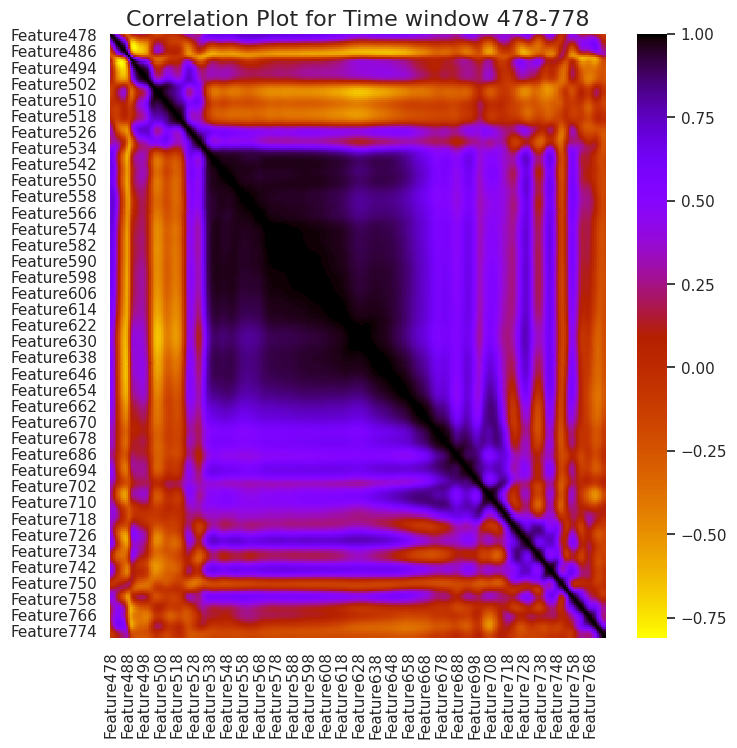

In [12]:
# Compute pairwise correlation of columns
fig,ax= plt.subplots(figsize=(8,8),dpi=100)
sns.heatmap(shifted_df.corr(),ax=ax,cmap='gnuplot_r')
ax.set_title(f"Correlation Plot for Time window {center-offset}-{center+offset}",fontsize=16)
plt.show()

In [13]:
# Get statistics for each feature
shifted_df_statistics = shifted_df.describe().T
shifted_df_statistics.tail()

,count,mean,std,min,25%,50%,75%,max
Feature773,10000.0,0.003485,0.002148,0.000049,0.001740,0.002949,0.005002,0.009452
Feature774,10000.0,0.003504,0.001969,0.000102,0.001969,0.003005,0.004896,0.009449
Feature775,10000.0,0.003576,0.001821,0.000063,0.002184,0.003236,0.004889,0.009230
Feature776,10000.0,0.003629,0.001711,0.000025,0.002330,0.003398,0.004876,0.008979
Feature777,10000.0,0.003622,0.001625,0.000064,0.002430,0.003446,0.004775,0.008551


In [14]:
# Feature that has the largest mean-value for magnetization
shifted_df_statistics[shifted_df_statistics['mean']==shifted_df_statistics['mean'].max()]

,count,mean,std,min,25%,50%,75%,max
Feature628,10000.0,0.231133,0.150184,0.003307,0.09299,0.226915,0.359814,0.500036


In [15]:
shifted_df_statistics.sort_values('mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Feature628,10000.0,0.231133,0.150184,0.003307,0.092990,0.226915,0.359814,0.500036
Feature627,10000.0,0.230491,0.149505,0.003490,0.093577,0.226299,0.358889,0.496433
Feature629,10000.0,0.227621,0.148702,0.003043,0.090282,0.222959,0.354697,0.496413
Feature626,10000.0,0.225907,0.146756,0.003534,0.092197,0.220428,0.352118,0.486065
Feature630,10000.0,0.220137,0.145173,0.002773,0.085812,0.214819,0.343263,0.485970
Feature625,10000.0,0.217954,0.142224,0.003415,0.088783,0.211786,0.340315,0.469822
Feature631,10000.0,0.209234,0.139904,0.002560,0.079693,0.202588,0.327058,0.469616
Feature624,10000.0,0.207478,0.136342,0.003158,0.084092,0.200136,0.324630,0.449169
Feature632,10000.0,0.195759,0.133341,0.002447,0.072072,0.187208,0.306857,0.448769
Feature623,10000.0,0.195475,0.129627,0.002827,0.078454,0.187355,0.307236,0.425796


In [16]:
shifted_df_statistics.sort_values('std',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Feature628,10000.0,0.231133,0.150184,0.003307,0.092990,0.226915,0.359814,0.500036
Feature627,10000.0,0.230491,0.149505,0.003490,0.093577,0.226299,0.358889,0.496433
Feature629,10000.0,0.227621,0.148702,0.003043,0.090282,0.222959,0.354697,0.496413
Feature626,10000.0,0.225907,0.146756,0.003534,0.092197,0.220428,0.352118,0.486065
Feature630,10000.0,0.220137,0.145173,0.002773,0.085812,0.214819,0.343263,0.485970
Feature625,10000.0,0.217954,0.142224,0.003415,0.088783,0.211786,0.340315,0.469822
Feature631,10000.0,0.209234,0.139904,0.002560,0.079693,0.202588,0.327058,0.469616
Feature624,10000.0,0.207478,0.136342,0.003158,0.084092,0.200136,0.324630,0.449169
Feature632,10000.0,0.195759,0.133341,0.002447,0.072072,0.187208,0.306857,0.448769
Feature623,10000.0,0.195475,0.129627,0.002827,0.078454,0.187355,0.307236,0.425796


# Clustering

In [17]:
from sklearn.cluster import KMeans

In [34]:
mms = MinMaxScaler().fit(shifted_data)
data_transformed = mms.transform(shifted_data)

## Three clusters

In [35]:
kmeans = KMeans(n_clusters=3,init="k-means++")
kmeans.fit(data_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Plot cluster centroids

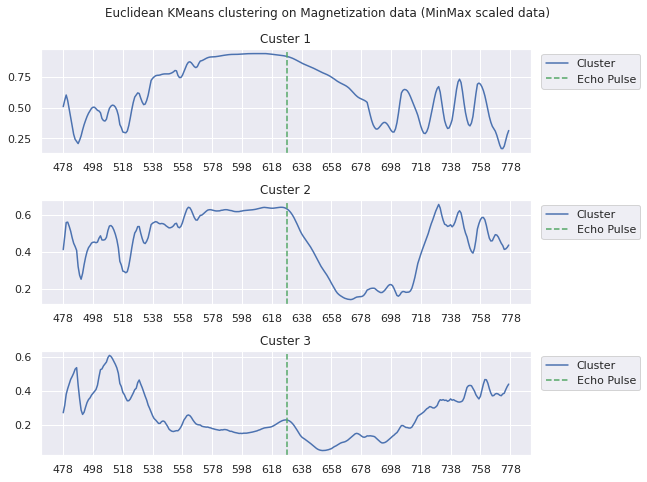

In [70]:
fig,axes = plt.subplots(3,1,figsize=(9,7))
for idx,ax in np.ndenumerate(axes):
    ax.plot(range(center-offset,center+offset),
            kmeans.cluster_centers_[idx[0],:],
            label='Cluster')
    ax.set_title(f"Custer {idx[0] +1}",fontsize=12)
    ax.axvline(x=center,color='g',ls='--',label='Echo Pulse')
    ax.legend(bbox_to_anchor=[1.01,1])
    ax.set_xticks(np.arange(center-offset,center+offset+1,20))
    
plt.suptitle("Euclidean KMeans clustering on Magnetization data (MinMax scaled data)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Plot data with clusters

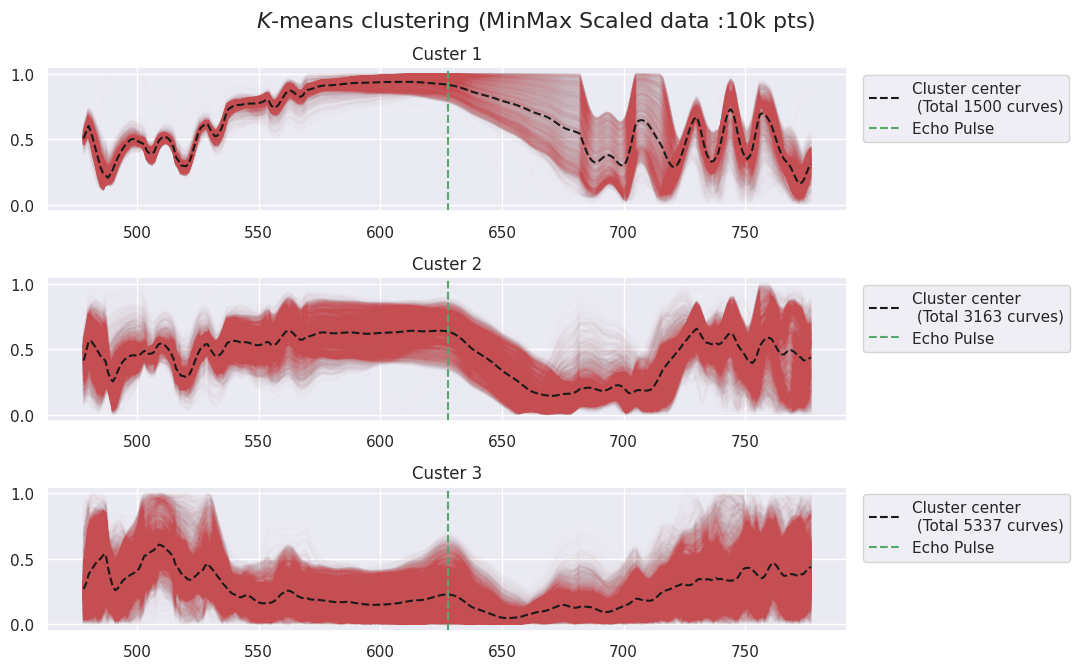

In [67]:
fig,axes = plt.subplots(3,1,figsize=(11,7),dpi=100)
ncurves = [len(shifted_data[kmeans.labels_ == i]) for i in range(3)]

for yi in range(3):
    for timeseries in data_transformed[kmeans.labels_ == yi]:
        axes[yi].plot(range(center-offset,center+offset),
                      timeseries.ravel(), "r-", alpha=0.01)
    axes[yi].plot(range(center-offset,center+offset),
                  kmeans.cluster_centers_[yi].ravel(), "k--",
                  label=f'Cluster center \n (Total {ncurves[yi]} curves)')
    

for idx,ax in np.ndenumerate(axes):
    ax.set_title(f"Custer {idx[0] +1}",fontsize=12)
    ax.axvline(x=center,color='g',ls='--',label='Echo Pulse')
    ax.legend(bbox_to_anchor=[1.01,1])

plt.suptitle(
    f"$K$-means clustering (MinMax Scaled data :10k pts)",
    fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## PCA 2D on 3 Clusters and Plotting

In [150]:
pca2d_3clusters,pca2d_var = pca2D(data_transformed)
print("Variance cpatured by PCA axes:",pca2d_var)

Variance cpatured by PCA axes: [0.69833929 0.07559865]


In [152]:
pca2d_3clusters['cluster'] = kmeans.labels_ +1

In [153]:
npoints = 5000

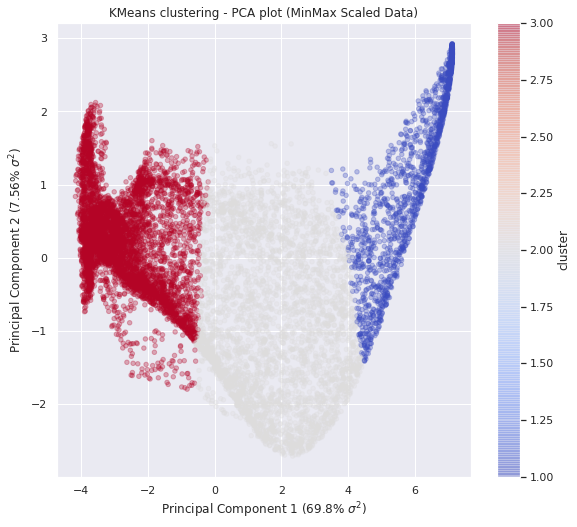

In [156]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
pca2d_3clusters.plot.scatter(x='PC1',y='PC2',c='cluster',
                        cmap='coolwarm',alpha=0.3,ax=ax)
ax.set(xlabel=f"Principal Component 1 ({pca2d_var[0]*100:.3}% $\sigma ^2$)",
       ylabel=f"Principal Component 2 ({pca2d_var[1]*100:.3}% $\sigma ^2$)",
       title="KMeans clustering - PCA plot (MinMax Scaled Data)")
plt.show()

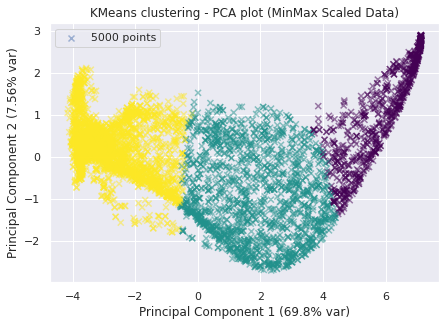

In [157]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.scatter(pca2d_3clusters.iloc[get_random_points(0,10_000,npoints),0], 
            pca2d_3clusters.iloc[get_random_points(0,10_000,npoints),1],
            c=kmeans.labels_[get_random_points(0,10_000,npoints)],
            cmap='viridis',marker='x',label=f"{npoints} points",
           alpha=0.5)
ax.set(xlabel=f"Principal Component 1 ({pca2d_var[0]*100:.3}% var)",
       ylabel=f"Principal Component 2 ({pca2d_var[1]*100:.3}% var)",
       title="KMeans clustering - PCA plot (MinMax Scaled Data)")
ax.legend()
plt.show()

## Two clusters

In [71]:
kmeans2 = KMeans(n_clusters=2,init="k-means++")
kmeans2.fit(data_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Plotting the two clusters

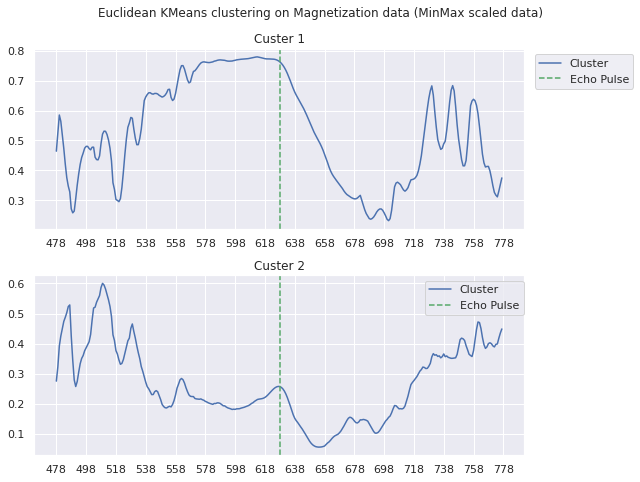

In [72]:
fig,axes = plt.subplots(2,1,figsize=(9,7))
for idx,ax in np.ndenumerate(axes):
    ax.plot(range(center-offset,center+offset),
            kmeans2.cluster_centers_[idx[0],:],
            label='Cluster')
    ax.set_title(f"Custer {idx[0] +1}",fontsize=12)
    ax.axvline(x=center,color='g',ls='--',label='Echo Pulse')
    ax.legend(bbox_to_anchor=[1.01,1])
    ax.set_xticks(np.arange(center-offset,center+offset+1,20))
    
plt.suptitle("Euclidean KMeans clustering on Magnetization data (MinMax scaled data)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

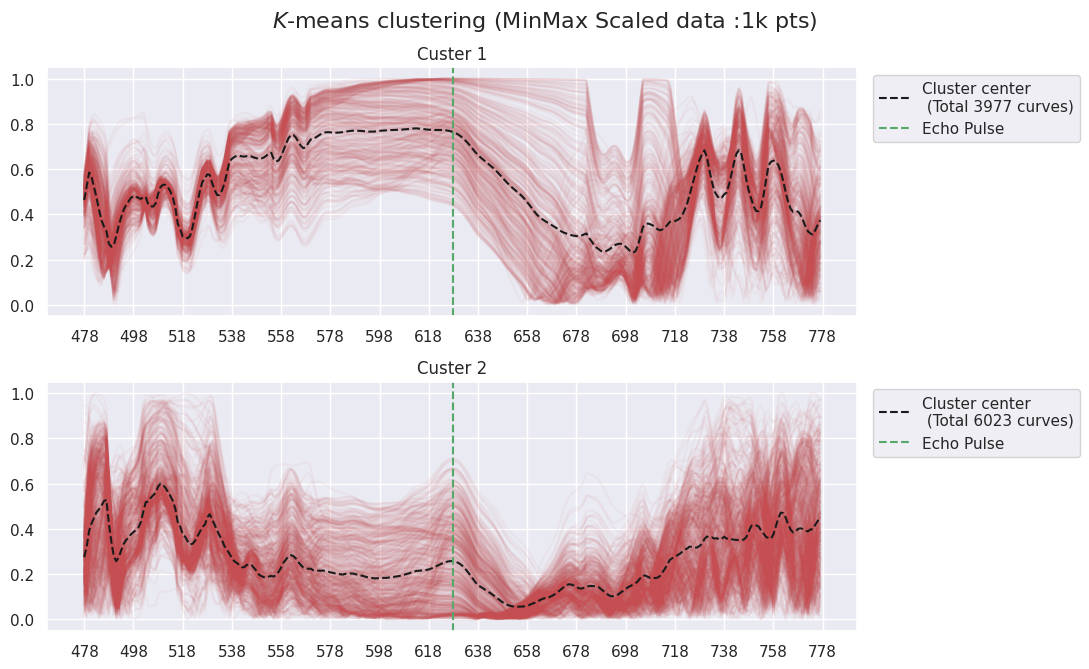

In [89]:
fig,axes = plt.subplots(2,1,figsize=(11,7),dpi=100)
ncurves = [len(shifted_data[kmeans2.labels_ == i]) for i in range(3)]

for yi in range(2):
    for timeseries in data_transformed[:1000,:][kmeans2.labels_[:1000] == yi]:
        axes[yi].plot(range(center-offset,center+offset),
                      timeseries.ravel(), "r-", alpha=0.05)
    axes[yi].plot(range(center-offset,center+offset),
                  kmeans2.cluster_centers_[yi].ravel(), "k--",
                  label=f'Cluster center \n (Total {ncurves[yi]} curves)')
    

for idx,ax in np.ndenumerate(axes):
    ax.set_title(f"Custer {idx[0] +1}",fontsize=12)
    ax.axvline(x=center,color='g',ls='--',label='Echo Pulse')
    ax.legend(bbox_to_anchor=[1.01,1])
    ax.set_xticks(np.arange(center-offset,center+offset+1,20))

plt.suptitle(
    f"$K$-means clustering (MinMax Scaled data :1k pts)",
    fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### PCA plot with 2 clusters

In [138]:
pca2d_data['cluster'] = kmeans2.labels_ +1
print(pca2d_data['cluster'].value_counts())

2    6023
1    3977
Name: cluster, dtype: int64


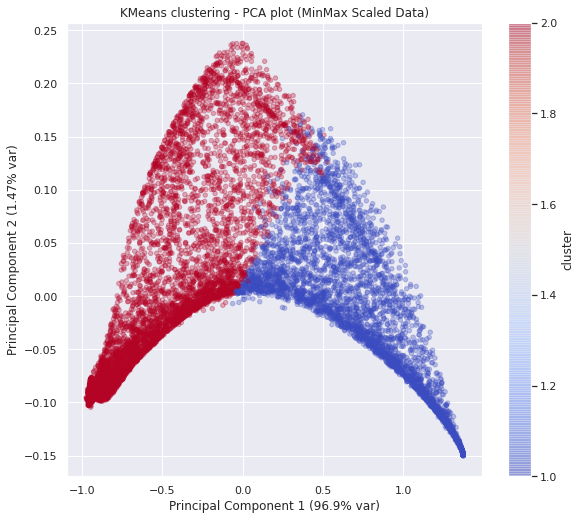

In [147]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
pca2d_data.plot.scatter(x='PC1',y='PC2',c='cluster',
                        cmap='coolwarm',alpha=0.3,ax=ax)
ax.set(xlabel=f"Principal Component 1 ({pca2d_var[0]*100:.3}% var)",
       ylabel=f"Principal Component 2 ({pca2d_var[1]*100:.3}% var)",
       title="KMeans clustering - PCA plot (MinMax Scaled Data)")
plt.show()

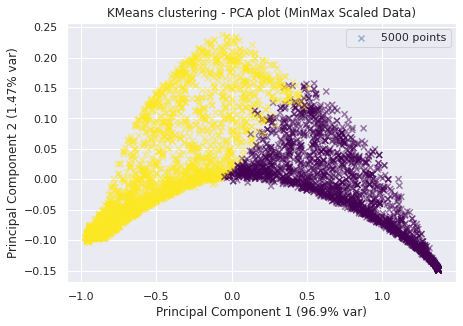

In [140]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.scatter(pca2d_data.iloc[get_random_points(0,10_000,npoints),0], 
            pca2d_data.iloc[get_random_points(0,10_000,npoints),1],
            c=kmeans2.labels_[get_random_points(0,10_000,npoints)],
            cmap='viridis',marker='x',label=f"{npoints} points",
           alpha=0.5)
ax.set(xlabel=f"Principal Component 1 ({pca2d_var[0]*100:.3}% var)",
       ylabel=f"Principal Component 2 ({pca2d_var[1]*100:.3}% var)",
       title="KMeans clustering - PCA plot (MinMax Scaled Data)")
ax.legend()
plt.show()

## Choosing the right number of clusters

In [38]:
no_clusters = 15
Sum_of_squared_distances = np.zeros(no_clusters)

for k in range(1,no_clusters+1):
    km = KMeans(n_clusters=k,init="k-means++",verbose=True,
                n_jobs=5,algorithm='elkan')
    km = km.fit(shifted_data)
    Sum_of_squared_distances[k-1]=km.inertia_

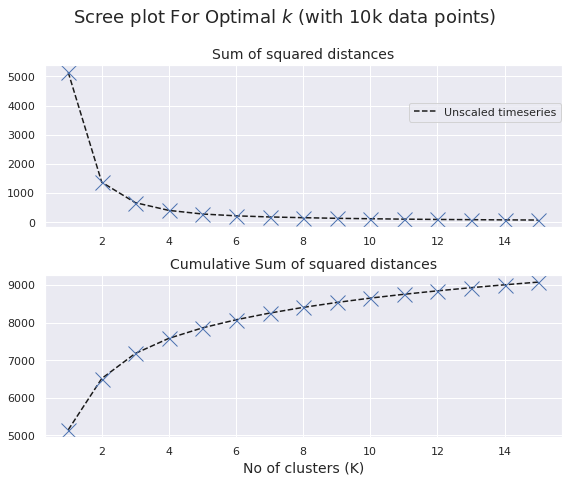

In [41]:
fig,axes = plt.subplots(2,1,figsize=(8,7))

axes[0].plot(range(1,no_clusters+1), Sum_of_squared_distances, 'k--',
             label='Unscaled timeseries')
axes[0].plot(range(1,no_clusters+1), Sum_of_squared_distances, 'bx',markersize=15)
axes[0].set_title('Sum of squared distances',fontsize=14)

axes[1].plot(range(1,no_clusters+1),np.cumsum(Sum_of_squared_distances),'k--')
axes[1].plot(range(1,no_clusters+1),np.cumsum(Sum_of_squared_distances),'bx',markersize=15)
axes[1].set_title('Cumulative Sum of squared distances',fontsize=14)
axes[1].set_xlabel('No of clusters (K)',fontsize=14)


axes[0].legend(bbox_to_anchor=[1.01,0.8])
plt.suptitle('Scree plot For Optimal $k$ (with 10k data points)',fontsize=18)

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()